In [15]:
%matplotlib inline

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

gpwb = pd.read_csv('./vektis/vektis_2020.csv', sep=';')
gpwb.info()

gpwb = gpwb[['leeftijdsklasse', 'kosten_specialistische_ggz', 'kosten_langdurige_ggz', 'kosten_generalistische_basis_ggz', 'aantal_verzekerdejaren']]
gpwb = gpwb[gpwb['leeftijdsklasse'] != '90+']

# Convert leeftijdsklasse to float
gpwb['leeftijdsklasse'] = gpwb['leeftijdsklasse'].astype(float)

# Convert leeftijdsklasse to categories with intervals of 10
gpwb['leeftijdsklasse'] = pd.cut(gpwb['leeftijdsklasse'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+'])
gpwb


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137261 entries, 0 to 137260
Data columns (total 29 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   geslacht                                137260 non-null  object 
 1   leeftijdsklasse                         137260 non-null  object 
 2   postcode_3                              137260 non-null  float64
 3   aantal_bsn                              137261 non-null  int64  
 4   aantal_verzekerdejaren                  137261 non-null  float64
 5   kosten_medisch_specialistische_zorg     137261 non-null  float64
 6   kosten_farmacie                         137261 non-null  float64
 7   kosten_specialistische_ggz              137261 non-null  float64
 8   kosten_huisarts_inschrijftarief         137261 non-null  float64
 9   kosten_huisarts_consult                 137261 non-null  float64
 10  kosten_huisarts_mdz                     1372

,leeftijdsklasse,kosten_specialistische_ggz,kosten_langdurige_ggz,kosten_generalistische_basis_ggz,aantal_verzekerdejaren
0,30-40,27442.25,0.00,3740.11,206.07
1,30-40,110943.17,57983.66,3659.15,382.27
2,30-40,140462.90,0.00,6283.54,202.46
3,50-60,25501.81,0.00,2010.41,207.75
4,50-60,0.00,0.00,4948.27,207.07
...,...,...,...,...,...
137256,80+,0.00,0.00,0.00,62.00
137257,80+,0.00,0.00,0.00,20.77
137258,80+,0.00,0.00,0.00,21.56
137259,80+,0.00,0.00,0.00,21.16


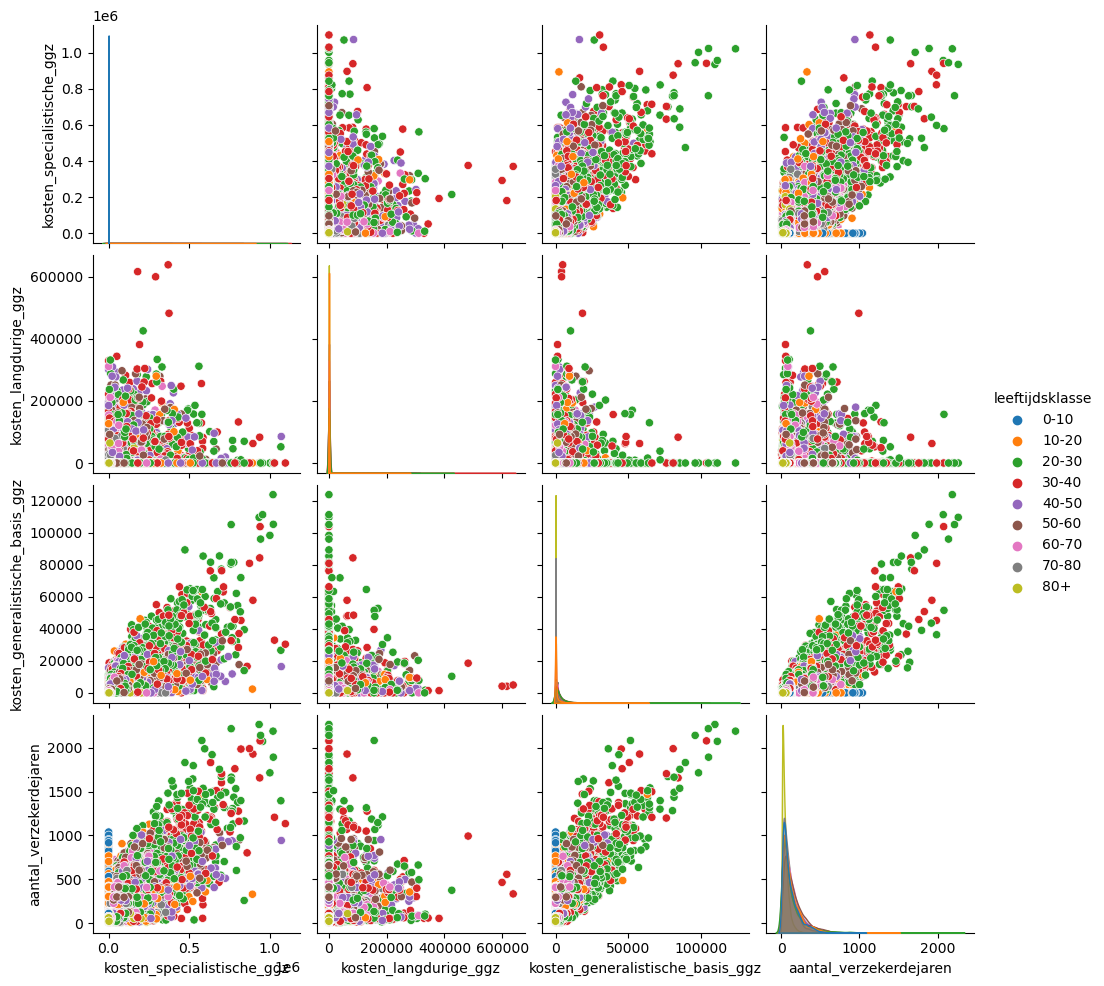

In [16]:
sb.pairplot(gpwb, hue='leeftijdsklasse')

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9)
gpwbWithout = gpwb.drop(columns=['leeftijdsklasse'])
kmeans.fit(gpwbWithout)
pd.crosstab(gpwb['leeftijdsklasse'], kmeans.labels_)

col_0,0,1
leeftijdsklasse,,
0-10,15152,0
10-20,14739,612
20-30,12673,2455
30-40,13017,2166
40-50,13577,1799
50-60,14165,1405
60-70,14746,725
70-80,14729,341
80+,11937,85


In [18]:
for x in range(20):
    kmeans = KMeans(n_clusters=x+1)
    kmeans.fit(gpwbWithout)

1 : 655033035903762.0
2 : 350047351350275.94
3 : 192377654564204.28
4 : 107412114795896.66
5 : 72113543104720.6
6 : 54772630728227.6
7 : 44598667419312.21
8 : 35824833319632.055
9 : 29520162859273.465
10 : 25354398874216.21
11 : 22239180952654.77
12 : 19356769127470.074
13 : 17266970092915.438
14 : 15686813192360.553
15 : 14504575320093.676
16 : 13310699611349.172
17 : 12185552692207.61
18 : 11300956451700.828
19 : 10511976589301.932


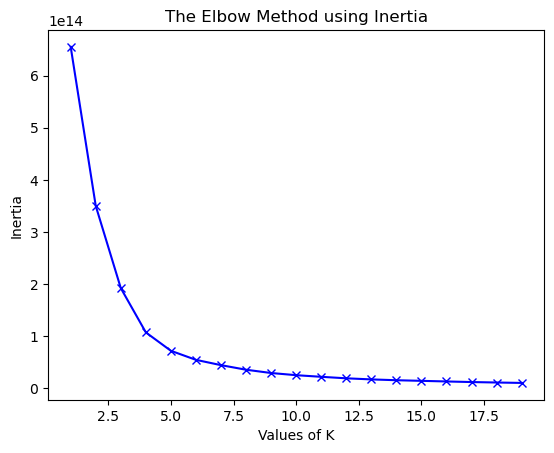

In [19]:
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(gpwbWithout)
    kmeanModel.fit(gpwbWithout)
  
    distortions.append(sum(np.min(cdist(gpwbWithout, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / gpwbWithout.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(gpwbWithout, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / gpwbWithout.shape[0]
    mapping2[k] = kmeanModel.inertia_


for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()